# Diabetes prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
df=pd.read_csv(r"C:\Users\vamsh\Downloads\archive (14)\diabetes_prediction_dataset.csv")

In [3]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# EDA

In [5]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [7]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


<Axes: ylabel='count'>

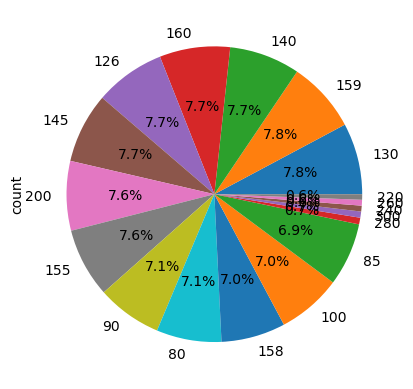

In [8]:
df.blood_glucose_level.value_counts().plot(kind="pie",autopct="%.1f%%")

<Axes: ylabel='count'>

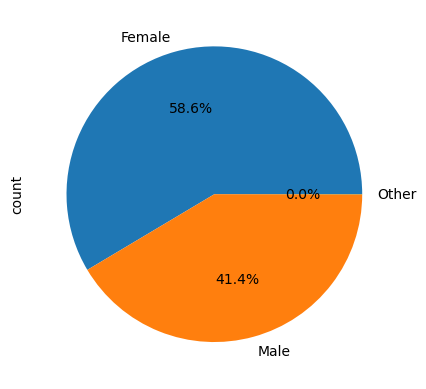

In [9]:
df.gender.value_counts().plot(kind="pie",autopct="%.1f%%")

<Axes: ylabel='count'>

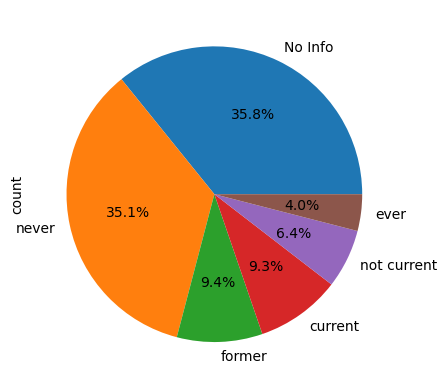

In [10]:
df.smoking_history.value_counts().plot(kind="pie",autopct="%.1f%%")

<Axes: xlabel='diabetes'>

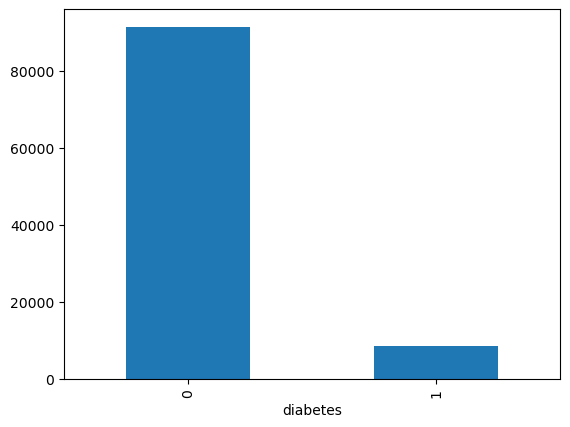

In [11]:
df.diabetes.value_counts().plot(kind="bar",stacked=True)

<Axes: xlabel='diabetes'>

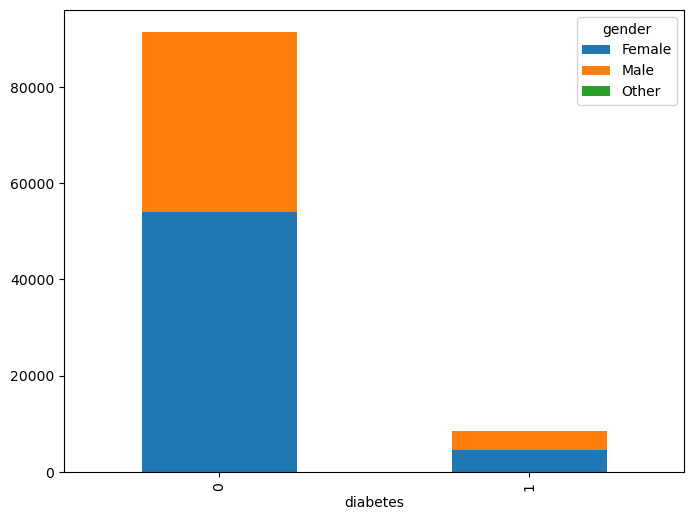

In [20]:
pd.crosstab(df.diabetes,df.gender).plot(kind="bar",stacked=True,figsize=(8, 6))

<Axes: xlabel='age'>

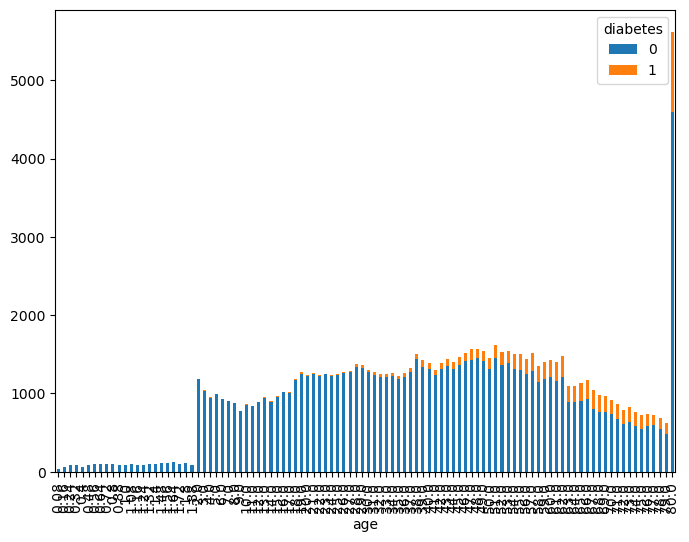

In [22]:
pd.crosstab(df.age,df.diabetes).plot(kind="bar",stacked=True,figsize=(8, 6))

<Axes: xlabel='gender'>

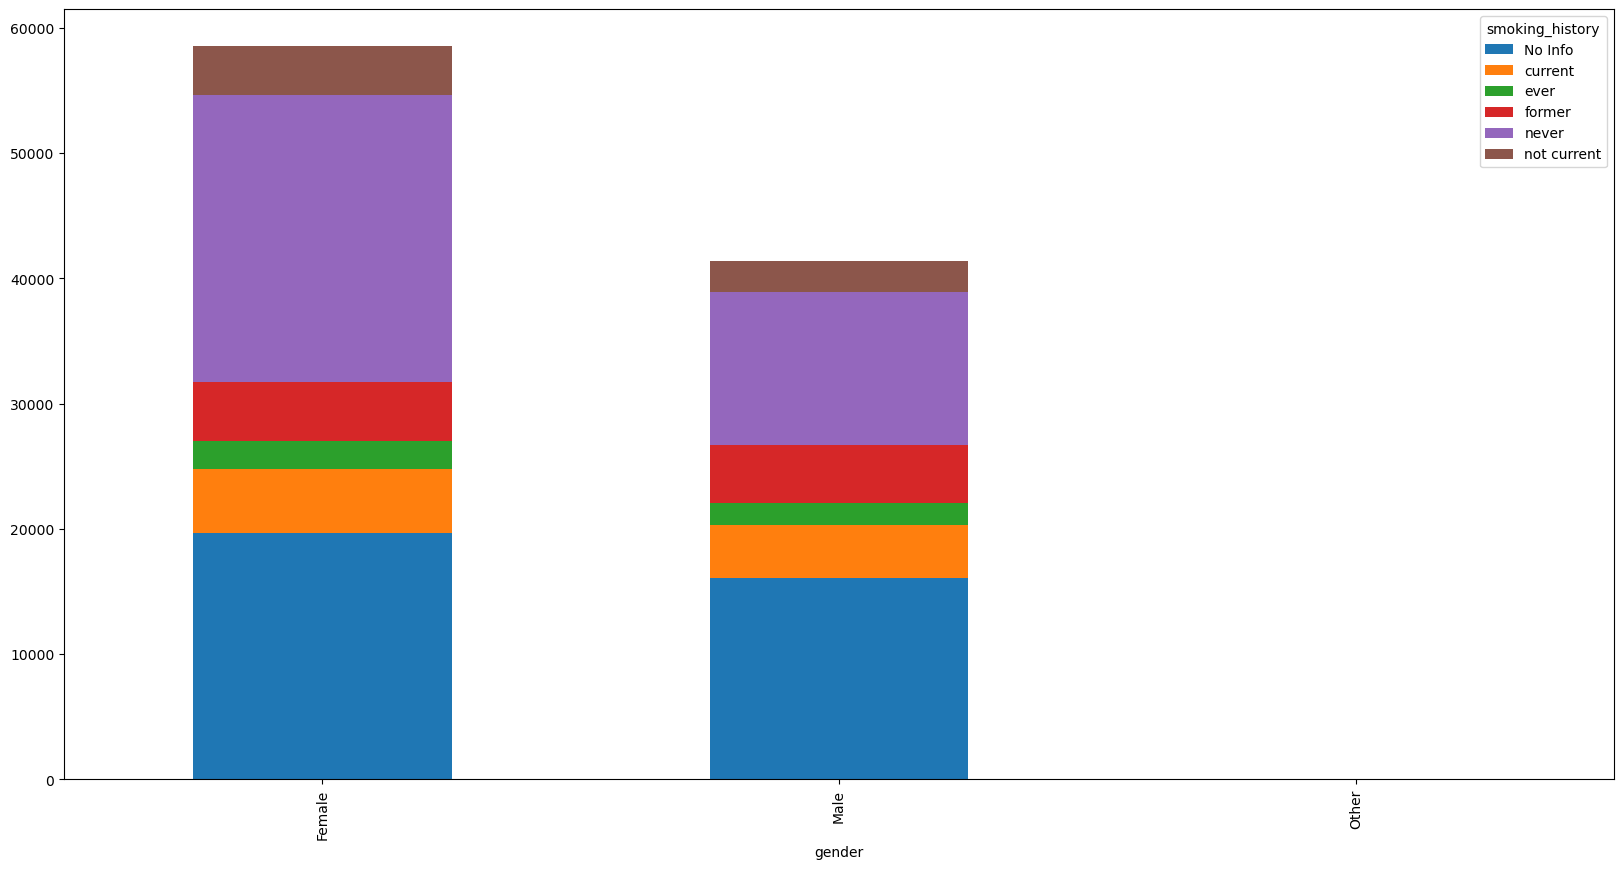

In [13]:
pd.crosstab(df.gender,df.smoking_history).plot(kind="bar",stacked=True,figsize=(20,10))

# Data Preprocessing

In [13]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [15]:
import seaborn as sns

<Axes: >

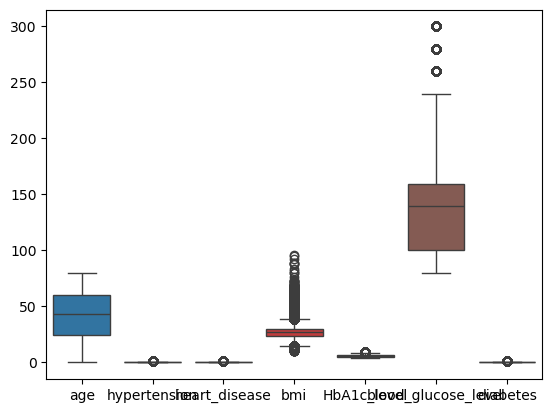

In [16]:
sns.boxplot(df)

In [17]:
for i in df:
    if df[i].dtype=='O':
        continue
    s=np.round(df[i].skew())
    if s==0:
        m=df[i].mean()
        s=df[i].std()
        lower=m-3*s
        upper=m+3*s
        df[i]=df[i].map(lambda x:lower if x<lower else upper if x>upper else x)
                                            #        df[i]=df[i].map(lambda x:lower if x<lower else upper if x>upper else x)

    else:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        low=q1-1.5*iqr
        upp=q3+1.5*iqr
        df[i]=df[i].map(lambda x:low if x<low else upp if x>upp else x)

<Axes: >

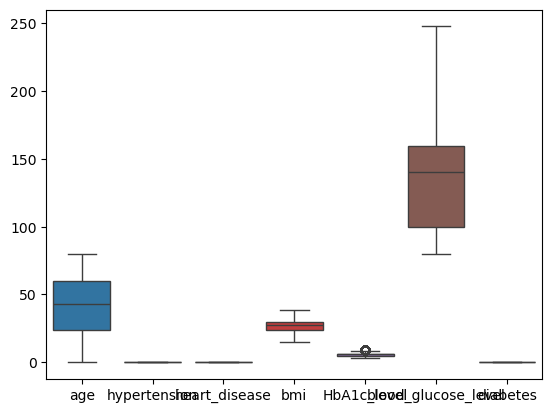

In [18]:
sns.boxplot(df)

In [19]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [20]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0.0,0.0,never,25.19,6.6,140.0,0.0
1,Female,54.0,0.0,0.0,No Info,27.32,6.6,80.0,0.0
2,Male,28.0,0.0,0.0,never,27.32,5.7,158.0,0.0
3,Female,36.0,0.0,0.0,current,23.45,5.0,155.0,0.0
4,Male,76.0,0.0,0.0,current,20.14,4.8,155.0,0.0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0.0,0.0,No Info,27.32,6.2,90.0,0.0
99996,Female,2.0,0.0,0.0,No Info,17.37,6.5,100.0,0.0
99997,Male,66.0,0.0,0.0,former,27.83,5.7,155.0,0.0
99998,Female,24.0,0.0,0.0,never,35.42,4.0,100.0,0.0


## Encoding


In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
ohe=OneHotEncoder(drop='first')

In [23]:
ohe

OneHotEncoder(drop='first')

In [24]:
ohe.fit(df[["gender"]])

OneHotEncoder(drop='first')

In [25]:
ohe.transform(df[["gender"]])

<100000x2 sparse matrix of type '<class 'numpy.float64'>'
	with 41448 stored elements in Compressed Sparse Row format>

In [26]:
arr1=ohe.transform(df[["gender"]]).toarray()
arr1

array([[0., 0.],
       [0., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 0.],
       [0., 0.]])

In [27]:
ohe.categories_

[array(['Female', 'Male', 'Other'], dtype=object)]

In [28]:
A=pd.DataFrame(arr1,columns=[['m','o']],dtype="int")

In [29]:
A

,m,o
0,0,0
1,0,0
2,1,0
3,0,0
4,1,0
...,...,...
99995,0,0
99996,0,0
99997,1,0
99998,0,0


In [30]:
from sklearn.preprocessing import OrdinalEncoder

In [31]:
od=OrdinalEncoder()

In [32]:
od

OrdinalEncoder()

In [33]:
od.fit(df[['smoking_history']])

OrdinalEncoder()

In [34]:
od.transform(df[['smoking_history']])

array([[4.],
       [0.],
       [4.],
       ...,
       [3.],
       [4.],
       [1.]])

In [35]:
df['smoking_history']=od.transform(df[['smoking_history']])

In [36]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0.0,0.0,4.0,25.19,6.6,140.0,0.0
1,Female,54.0,0.0,0.0,0.0,27.32,6.6,80.0,0.0
2,Male,28.0,0.0,0.0,4.0,27.32,5.7,158.0,0.0
3,Female,36.0,0.0,0.0,1.0,23.45,5.0,155.0,0.0
4,Male,76.0,0.0,0.0,1.0,20.14,4.8,155.0,0.0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0.0,0.0,0.0,27.32,6.2,90.0,0.0
99996,Female,2.0,0.0,0.0,0.0,17.37,6.5,100.0,0.0
99997,Male,66.0,0.0,0.0,3.0,27.83,5.7,155.0,0.0
99998,Female,24.0,0.0,0.0,4.0,35.42,4.0,100.0,0.0


In [37]:
df=pd.concat([df,A],axis=1)

In [38]:
df.drop(['gender'],axis=1,inplace=True)

In [39]:
df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,"(m,)","(o,)"
0,80.0,0.0,0.0,4.0,25.19,6.6,140.0,0.0,0,0
1,54.0,0.0,0.0,0.0,27.32,6.6,80.0,0.0,0,0
2,28.0,0.0,0.0,4.0,27.32,5.7,158.0,0.0,1,0
3,36.0,0.0,0.0,1.0,23.45,5.0,155.0,0.0,0,0
4,76.0,0.0,0.0,1.0,20.14,4.8,155.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0.0,0.0,0.0,27.32,6.2,90.0,0.0,0,0
99996,2.0,0.0,0.0,0.0,17.37,6.5,100.0,0.0,0,0
99997,66.0,0.0,0.0,3.0,27.83,5.7,155.0,0.0,1,0
99998,24.0,0.0,0.0,4.0,35.42,4.0,100.0,0.0,0,0


# spliting

In [40]:
X=df.drop(['diabetes'],axis=1)

In [41]:
y=df['diabetes']

In [42]:
# Assuming X is your feature matrix
X.columns = [str(col) if not isinstance(col, str) else col for col in X.columns]


In [43]:
# imbalace for the dependent coloumn
from imblearn.over_sampling import SMOTE

In [44]:
s=SMOTE()

In [45]:
s

SMOTE()

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

# Generate a sample multi-class imbalanced dataset
X, y = make_classification(n_classes=3, class_sep=2, weights=[0.1, 0.2, 0.7], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=42)

# Check class distribution before applying SMOTE
print('Original class distribution:', Counter(y))

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after applying SMOTE
print('Resampled class distribution:', Counter(y_resampled))


Original class distribution: Counter({2: 700, 1: 200, 0: 100})
Resampled class distribution: Counter({2: 700, 1: 700, 0: 700})


In [47]:
X_balanced,y_balanced=s.fit_resample(X,y)

In [48]:


# Convert the NumPy array y_balanced to a pandas Series
y_balanced_series = pd.Series(y_balanced)

# Check the class distribution after balancing using SMOTE
print('Resampled class distribution:', y_balanced_series.value_counts())


Resampled class distribution: 2    700
1    700
0    700
Name: count, dtype: int64


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.20,random_state=2)

In [51]:
X.shape

(1000, 20)

In [52]:
X_train.shape

(1680, 20)

In [53]:
y_train.shape

(1680,)

In [54]:
y_test.shape

(420,)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[140   0   0]
 [  0 139   0]
 [  2   1 138]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       140
           1       0.99      1.00      1.00       139
           2       1.00      0.98      0.99       141

    accuracy                           0.99       420
   macro avg       0.99      0.99      0.99       420
weighted avg       0.99      0.99      0.99       420

0.9928571428571429


# Model building

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
r=RandomForestClassifier()

In [59]:
r.fit(X_train,y_train)

RandomForestClassifier()

In [60]:
r.score(X_train,y_train)

1.0

In [61]:
r.score(X_test,y_test)

0.9880952380952381

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
d=DecisionTreeClassifier()

In [64]:
d.fit(X_train,y_train)

DecisionTreeClassifier()

In [65]:
d.score(X_train,y_train)

1.0

In [66]:
d.score(X_test,y_test)

0.9880952380952381

In [67]:
from sklearn.ensemble import AdaBoostClassifier

In [68]:
ada=AdaBoostClassifier()

In [69]:
ada

AdaBoostClassifier()

In [70]:
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [71]:
ada.score(X_train,y_train)

0.9916666666666667

In [72]:
ada.score(X_test,y_test)

0.9857142857142858

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
import time

In [75]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

rfc_model = RandomForestClassifier()
ada_model = AdaBoostClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()
dtree_model=DecisionTreeClassifier()
model = [rfc_model, ada_model, dtree_model, xgb_model]

for m in model :
    sc = cross_val_score(m, X,y, cv = 20, n_jobs=-1)
    print(m)
    print(sc)
    print("-----------------------")
    print(sc.mean())
    print("***************************")
    time.sleep(2)
    

RandomForestClassifier()
[1.   0.94 0.98 0.98 1.   1.   0.98 0.98 1.   0.98 1.   1.   0.98 1.
 0.98 1.   1.   1.   1.   0.98]
-----------------------
0.9890000000000001
***************************
AdaBoostClassifier()
[1.   0.98 0.98 0.98 0.96 0.92 0.98 0.86 1.   0.88 0.94 1.   0.9  0.98
 1.   1.   1.   0.9  0.88 0.94]
-----------------------
0.954
***************************
DecisionTreeClassifier()
[0.98 0.94 0.98 0.98 0.96 0.98 0.96 0.98 0.98 0.98 1.   1.   0.96 0.98
 0.96 1.   0.98 0.98 1.   1.  ]
-----------------------
0.9789999999999999
***************************
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
